# IN CLASS DEMO

In [3]:
# import packages
import lux
import pandas as pd
import missingno as msno
#%matplotlib widget
#from ipywidgets import *

In [26]:
# import project data
df = pd.read_csv("../../01_consolidatedData/CEOLife_MinVia.csv")

### MissingNo Demo

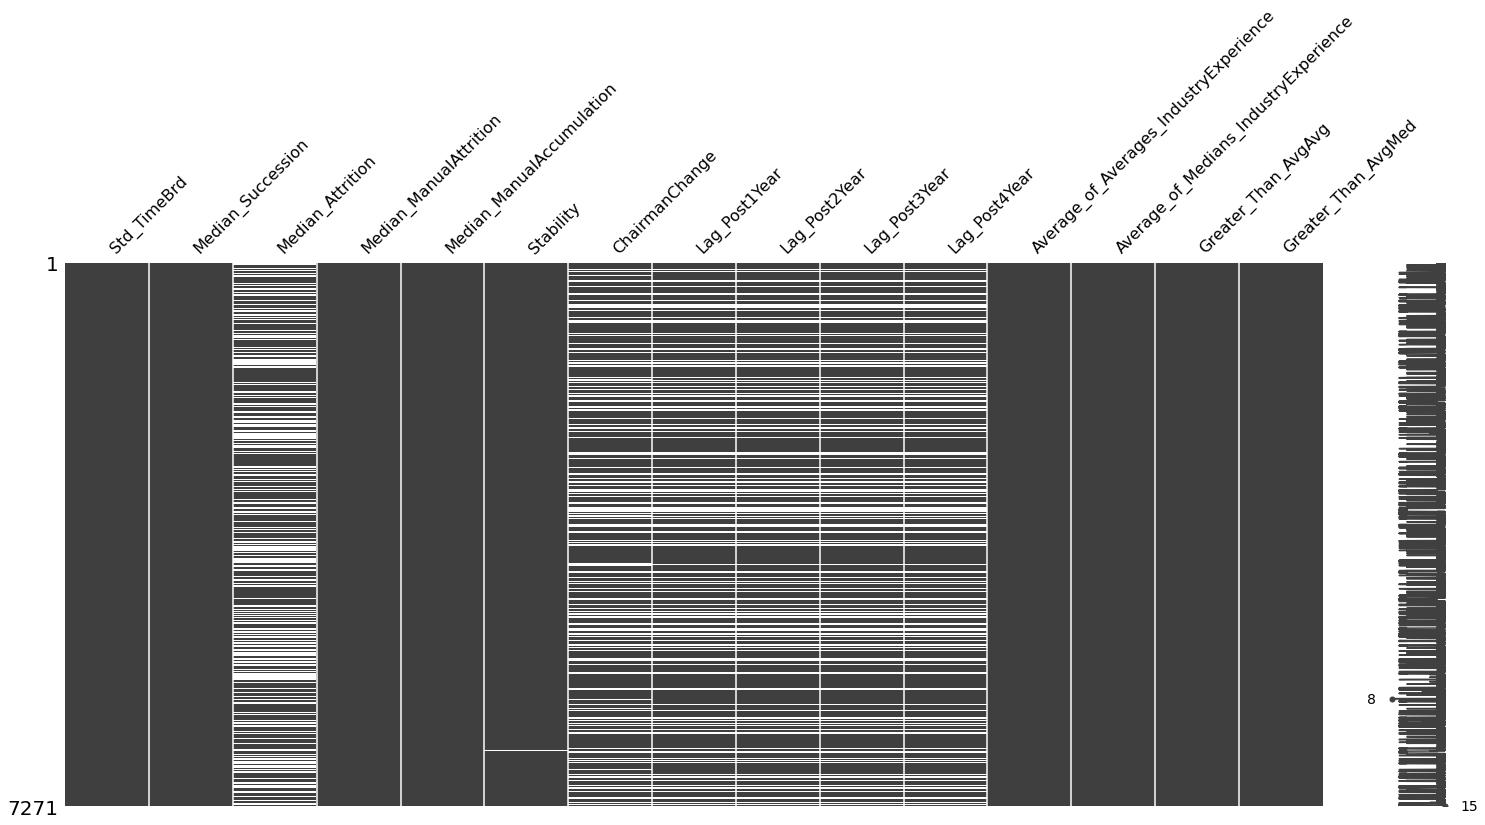

In [5]:
%matplotlib inline
# use a subset of our data that has missing data
msno_plot = msno.matrix(df.iloc[:,-15:])

### Lux Demo

In [6]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [7]:
iris

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Scrapping Data Demo

**Use key stroke recorded for automating navigating and scraping website**

Katalon Extentsion: https://katalon.com/katalon-recorder-ide

In [19]:
from selenium import webdriver
import unittest, time, re
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from datetime import datetime
from selenium.webdriver.common.by import By

sp500 = pd.read_csv("../../00_data/All_SP500_Companies.csv")

symbols = list(sp500.Symbol)

test_symbols = symbols[0:5]

class AppDynamicsJob(unittest.TestCase):
  
    symbols = ['MMM',
               'ABT',
               'AAPL',
              ]
    
    cap_to_append = pd.DataFrame()
    
    def setUp(self):
        # AppDynamics will automatically override this web driver
        # as documented in https://docs.appdynamics.com/display/PRO44/Write+Your+First+Script
        self.driver = webdriver.Chrome(ChromeDriverManager().install())
        self.driver.implicitly_wait(30)
        self.base_url = "https://www.google.com/"
        self.verificationErrors = []
        self.accept_next_alert = True
    
    def test_app_dynamics_job(self, symbols):
        
        driver = self.driver
        driver.get("https://finance.yahoo.com/")
        
        for s in self.symbols:
            
            driver.get("https://finance.yahoo.com/")
            driver.find_element(by=By.ID, value="yfin-usr-qry").click()
            driver.find_element(by=By.ID, value="yfin-usr-qry").clear()
            driver.find_element(by=By.ID, value="yfin-usr-qry").send_keys(s)
            driver.find_element(by=By.ID, value="header-search-form").submit()
            driver.find_element(by=By.XPATH, value="//div[@id='quote-nav']/ul/li[5]/a/span").click()
            html = driver.page_source
            current_df = pd.read_html(html)[0]
            current_df = pd.DataFrame(current_df).transpose()
            current_df.columns = current_df.iloc[0]
            current_df_append = current_df[1:].copy()
            current_df_append["Ticker"] = s
            self.cap_to_append = pd.concat([self.cap_to_append, current_df_append])
            time.sleep(1)
        
        driver.quit()
            
        return self.cap_to_append
        
def build_capIQ():
    symbol_CapIQ_df = AppDynamicsJob()
    return symbol_CapIQ_df

In [20]:
# Execute Scraping
CapBuild = build_capIQ()
CapBuild.setUp()

df = pd.DataFrame(CapBuild.test_app_dynamics_job(test_symbols))



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Driver [/Users/ashish/.wdm/drivers/chromedriver/mac64/99.0.4844.51/chromedriver] found in cache
<ipython-input-19-b94c41e4973d>:26: DeprecationWarning:executable_path has been deprecated, please pass in a Service object


In [21]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()